In [2]:
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
#importing libraries

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()
# loading data

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x) 

#data cleanup

We have now generated multiple plots that tell us the top skills for data analysts, data scientists and data engineers. But now, we want to compare the values with each other, but they are all on different plots.

Conveniently, the pyplot module from matplotlib offers a subplots() function in order to graph everything on one single figure with the following syntax:

- fig, ax = plt.subplots(rows, cols,...)

fig and ax are 2 objects. The fig object refers to the entire figure and an ax(s) object refers to each of the individual plots/graphs on the figure

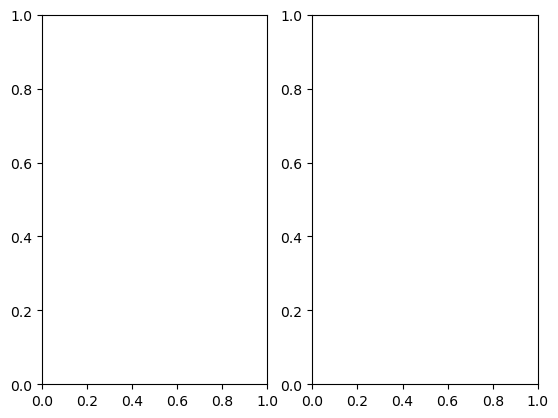

In [9]:
fig, ax = plt.subplots(1, 2)

Now, how can we get two plots into the same figure? Let's say I want to plot a bar chart for the count for each job title, and a bar chart for the number of jobs that are either full-time, part-time or internships?

<Axes: xlabel='job_title_short'>

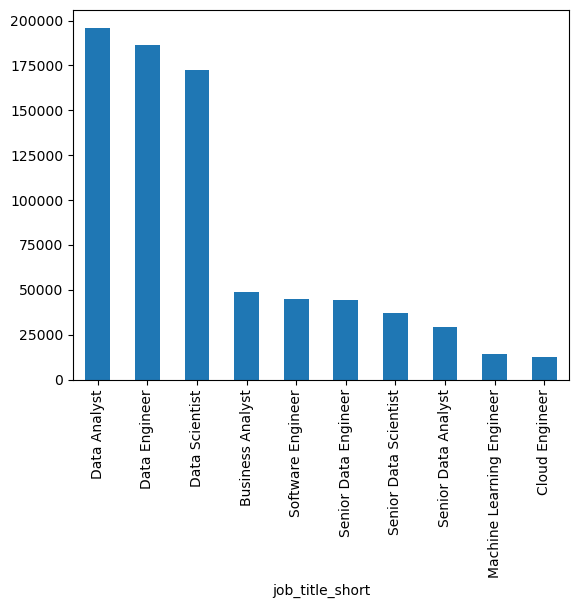

In [7]:
df['job_title_short'].value_counts().plot(kind='bar')

In [8]:
df['job_schedule_type'].value_counts().head(3)

job_schedule_type
Full-time     701727
Contractor     34793
Internship      8742
Name: count, dtype: int64

<Axes: xlabel='job_schedule_type'>

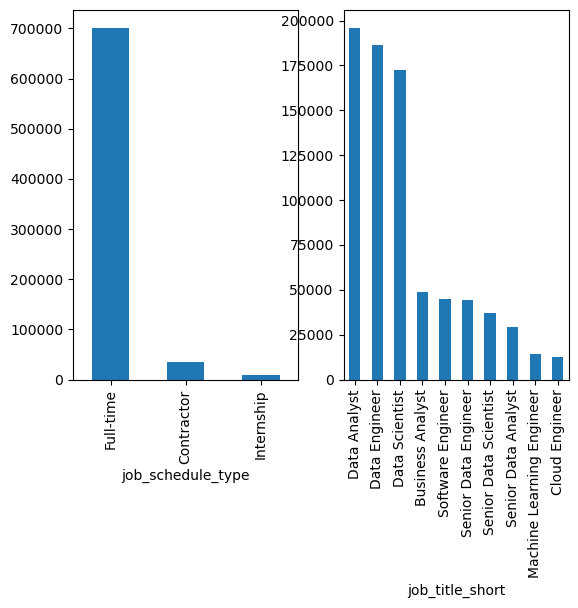

In [11]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])

Note:  the ax parameter typically refers to an Axes object, which represents a single plot or graph within a figure. This parameter is used to specify where the data is actually plotted, and next to ax we have to specify an index (similar to lists)

Here, we see that there is overlap between the two graphs. This can be fixed using a function called **tight_layout()**, and we want to apply this to the ENTIRE figure (use the fig object for this)

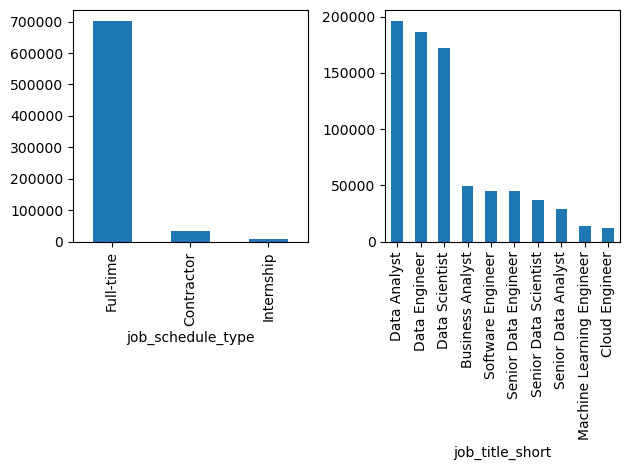

In [12]:
fig, ax = plt.subplots(1, 2)

df['job_title_short'].value_counts().plot(kind='bar', ax=ax[1])
df['job_schedule_type'].value_counts().head(3).plot(kind='bar', ax=ax[0])
fig.tight_layout()

# Note that here, we are using the Pandas Methods to plot these different visualisations

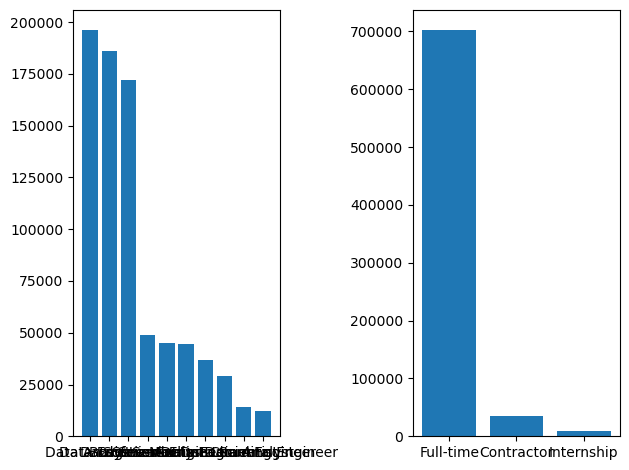

In [13]:
fig, ax = plt.subplots(1, 2)

ax[0].bar(df['job_title_short'].value_counts().index, df['job_title_short'].value_counts())
ax[1].bar(df['job_schedule_type'].value_counts().head(3).index, df['job_schedule_type'].value_counts().head(3))
plt.tight_layout()

# this is the same plot, but now coded using matplotlib. Rather than using the plot method, 
# we are now calling out each of the specific axes, running the applicable plot method
# as well as the x and y axis.

## Example- Counts of Top Skills in Job Postings

In [17]:
df_skills = df.copy()
df_skills = df_skills.explode('job_skills')
skills_count = df_skills.groupby(['job_skills','job_title_short']).size()
df_skills_count = skills_count.reset_index(name ='skill_count')
df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1480,python,Data Scientist,113711
1822,sql,Data Engineer,113130
1479,python,Data Engineer,108022
1821,sql,Data Analyst,92428
1823,sql,Data Scientist,78982
...,...,...,...
2173,webex,Senior Data Scientist,1
1054,mattermost,Data Scientist,1
270,clickup,Machine Learning Engineer,1
797,heroku,Senior Data Analyst,1


Now we are going to enumerate through a list using a for loop:

In [21]:
job_titles = ['Data Analyst', 'Data Scientist', 'Data Engineer']

for i, job_title in enumerate(job_titles):
    print(f'Index: {i}, Job: {job_title}')

# To "enumerate through a list" means to loop over the items in a list while keeping 
# track of each item's index (position) within the list. Variable 'i' returns the index,
# whilst 'job_title' refers the corresponding value in a list. We can use this loop to
# filter for the top 5 skills in each job role

Index: 0, Job: Data Analyst
Index: 1, Job: Data Scientist
Index: 2, Job: Data Engineer


In [30]:
for i, job_title in enumerate(job_titles):
     print(df_skills_count[df_skills_count['job_title_short'] == job_title].head(5))

# here we essentially filter for a dataframe where the job_title_short is equal
# to any of the values provided in the job_titles list aas well as the top 5 highest skill
# counts.

     job_skills job_title_short  skill_count
1821        sql    Data Analyst        92428
558       excel    Data Analyst        66860
1478     python    Data Analyst        57190
1941    tableau    Data Analyst        46455
1410   power bi    Data Analyst        39380
     job_skills job_title_short  skill_count
1480     python  Data Scientist       113711
1823        sql  Data Scientist        78982
1518          r  Data Scientist        59566
1637        sas  Data Scientist        29534
1943    tableau  Data Scientist        29445
     job_skills job_title_short  skill_count
1822        sql   Data Engineer       113130
1479     python   Data Engineer       108022
141         aws   Data Engineer        62049
151       azure   Data Engineer        60674
1772      spark   Data Engineer        53656


Now that we have this table, this is what we want to plot:

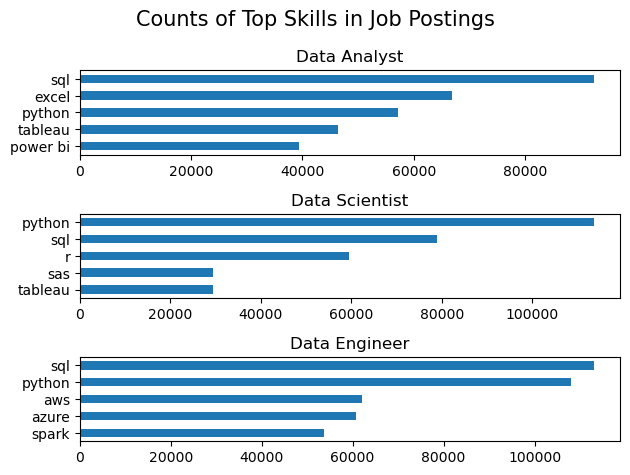

In [48]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('') #removes y lables 
    ax[i].legend().set_visible(False) #removes legend

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() #spaces graphs out


# remember, i refers to a specific indec corresponding to a given joob title, so it 
# separates skills plotted based on the job title

Finally, note that the x-axis scale of Data Scientists and Engineers are the same but this does not match for Data Analysts. 

For this, we can set the x-axis scale for all plots in the figure using the following code:

- ax[i].set_xlim(0, 120000)

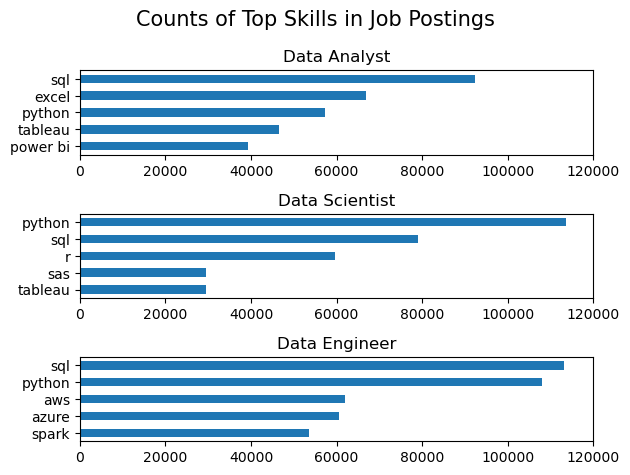

In [49]:
fig, ax = plt.subplots(3,1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')  
    ax[i].legend().set_visible(False) 
    ax[i].set_xlim(0, 120000)
    

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout() 


Now, we can derive insights from the charts and compare skills across different job postings:
- Many data science and data engineeer job postings requires Python
- SQL most commonly found in data engineer job postings

Note: in the next lessons, we will be moving away from determing the counts and rather analysing the percentage/likelihood of a skill appearing in a job posting as it will be more representative given there may be more data scientist/engineer roles than data analysts